The goal of this project is To find wether Playing the same opening repeatidly leads to a higher winrate

In [2]:
import pandas as pd

file = pd.read_csv('data/raw/games.csv')


In [4]:
print(file['white_id'].unique())
print(len(file['white_id'].unique()))

['bourgris' 'a-00' 'ischia' ... 'samael88' 'belcolt' 'marcodisogno']
9438


In [ ]:
# Group the dataframe by 'white_id' and 'opening_name'
grouped = file.groupby(['white_id', 'opening_name']) #find the opening with the best overall winrate

# Calculate the count of games and win rate for each group
table = grouped.agg({'id': 'count', 'winner': lambda x: (x == 'white').sum() / len(x)})

# Rename the columns
table.columns = ['Games Played', 'Win Rate']

# Reset the index to make 'white_id' and 'opening_name' columns
table.reset_index(inplace=True)

# Display the table
print(table)

# table.to_csv('data/processed/result.csv', index=False)


                  white_id                                       opening_name  \
0                  --jim--                               Scandinavian Defense   
1      -l-_jedi_knight_-l-                                  Guatemala Defense   
2      -l-_jedi_knight_-l-  King's Gambit Accepted |  Bishop's Gambit |  M...   
3      -l-_jedi_knight_-l-                                       Owen Defense   
4      -l-_jedi_knight_-l-      Scandinavian Defense: Mieses-Kotroc Variation   
...                    ...                                                ...   
17034                zynko                     Sicilian Defense: Old Sicilian   
17035              zzeecco                    Italian Game: Giuoco Pianissimo   
17036            zztopillo           King's Pawn Game: King's Head Opening #2   
17037               zzzbbb  Italian Game: Giuoco Pianissimo |  Italian Fou...   
17038              zzzimon                        Ruy Lopez: Steinitz Defense   

       Games Played  Win Ra

In [4]:
#find the openings used at least twice
result = (table[table["Games Played"] >= 1])
len(result)

17039

In [ ]:
#regroup by player with their overall winrate and the number of different openings they have played and add their elo from original data 
# (latest elo)
grouped = result.groupby(['white_id'])
table = grouped.agg({'opening_name': 'count', 'Win Rate': 'mean'}).reset_index()
table['Elo'] = grouped['white_id'].apply(lambda x: file[file['white_id'] == x.name]['white_rating'].iloc[-1]).values
table.columns = ['ID','Openings Played', 'Win Rate', 'Elo']

# table.to_csv('data/processed/result2.csv', index=False)

#chop the elo into 4 groups
table['Elo Group'] = pd.cut(table['Elo'], bins=[-float('inf'), 1200, 1600, 2000, float('inf')], labels=['-1200', '1200 - 1600', '1600 - 2000', '2000+'])
print(table)

# table.to_csv('data/processed/result3.csv', index=False)

                       ID  Openings Played  Win Rate   Elo    Elo Group
0                 --jim--                1       0.0   986        -1200
1     -l-_jedi_knight_-l-                4       0.5  1500  1200 - 1600
2                  -mati-                1       1.0  1252  1200 - 1600
3                 -pavel-                1       1.0  1383  1200 - 1600
4                 1063314                1       1.0  1666  1600 - 2000
...                   ...              ...       ...   ...          ...
9433                zynko                3       1.0  1494  1200 - 1600
9434              zzeecco                1       1.0  1525  1200 - 1600
9435            zztopillo                1       1.0  1466  1200 - 1600
9436               zzzbbb                1       1.0  1616  1600 - 2000
9437              zzzimon                1       0.0  1375  1200 - 1600

[9438 rows x 5 columns]


C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_48896\210483752.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = table.groupby(['Elo Group', 'Openings Played Group'])


Openings Played Group    1 or 2    3 or 4  5 or more
Elo Group                                           
-1200                  0.429805  0.311728   0.333605
1200 - 1600            0.502343  0.452590   0.476559
1600 - 2000            0.536652  0.528727   0.519589
2000+                  0.538846  0.646465   0.650921


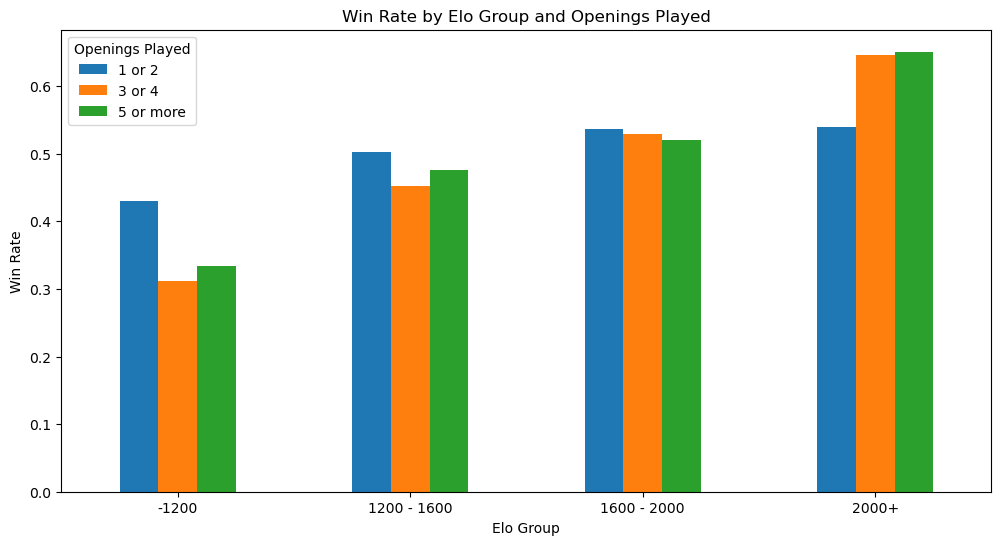

In [6]:
import matplotlib.pyplot as plt

# Group the dataframe by 'Elo Group' and categorize 'Openings Played'
table['Openings Played Group'] = pd.cut(table['Openings Played'], bins=[0, 2, 4, float('inf')], labels=['1 or 2', '3 or 4', '5 or more'])

# Group the dataframe by 'Elo Group' and 'Openings Played Group'
grouped = table.groupby(['Elo Group', 'Openings Played Group'])

# Calculate the mean win rate for each group
table = grouped.agg({'Win Rate': 'mean'}).reset_index()

# Pivot the table to have 'Elo Group' as index, 'Openings Played Group' as columns and 'Win Rate' as values
table = table.pivot(index='Elo Group', columns='Openings Played Group', values='Win Rate')

# Display the table
print(table)

# Plot the table
table.plot(kind='bar', figsize=(12, 6))
plt.title('Win Rate by Elo Group and Openings Played')
plt.xlabel('Elo Group')
plt.ylabel('Win Rate')
plt.xticks(rotation=0)
plt.legend(title='Openings Played')
plt.show()